# Test notebook for Metakernel_bash

## Setup


In [ ]:
# Functions to reload local metakernelrcs:
function reread_local_metakernelrc { source /home/mjbright/src/git/GIT_mjbright/metakernel/metakernel_bash/metakernelrc; }
function reread_local_user_metakernelrc { source /home/mjbright/src/git/GIT_mjbright/metakernel/metakernel_bash/metakernelrc.user; }

In [ ]:
pwd

In [ ]:
echo $ROOT_PATH_PREFIX

In [ ]:
reread_metakernelrc

In [ ]:
reread_user_metakernelrc

## Javascript magics

In [ ]:
%javascript console.log("Print in the browser console - via \"%javascript magic (console.log)\"")
%javascript window.alert("Show this popup - via \"%javascript magic (alert())\"")

In [ ]:
echo "window.alert('hello world - via \"window.alert() | js\"')" | js

In [ ]:
# TODO: need to interpret (display) returned object: <IPython.core.display.Javascript object>

js "window.alert('hello world - via \"window.alert() | js\"')"

## Python magics

In [ ]:
# TODO: ???

PYTHON "import sys; print('hello world from Python v{}.{}.{}({})'.format(sys.version_info[0],sys.version_info[1],sys.version_info[2],sys.version_info[3]))"

In [ ]:
echo "import sys; print('hello world from Python v{}.{}.{}({})'.format(sys.version_info[0],sys.version_info[1],sys.version_info[2],sys.version_info[3]))" | PYTHON

## HTML magics

In [ ]:
# TODO: need to interpret (display) returned object: <IPython.core.display.HTML object>

html "<h1>An html header <!-- A comment --></h1>"

In [1]:
echo "<h1>A table <!-- A comment --></h1>
<table><tr><th>col1</th>
<th>col2</th>
<th>col3</th>
<th>col4</th>
</tr>
<tr><td>val1</td>
    <td>val2</td>
    <td>val3</td>
    <td>val4</td>
</tr>
<tr><td>valu1</td>
    <td>value2</td>
    <td>value3</td>
    <td>val4</td>
</tr></table>" | html

col1,col2,col3,col4
val1,val2,val3,val4
valu1,value2,value3,val4


## Image display magics

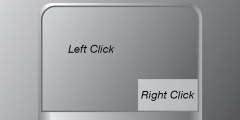

In [2]:
display /cygdrive/c/HP/drivers/touchpad/img_clicking.png

## CSV data - Graphics

Below data and initial csv_linechart copied/adapted from one of [d3noobs blocks](http://bl.ocks.org/d3noob) here:
 http://bl.ocks.org/d3noob/b3ff6ae1c120eea654b5

How about displaying that csv data in d3.js, called from a bash function?

In [ ]:
(echo "item,value"; du -s * | sort -nr | head -10 | awk '{ print $2","$1;}') > disk_usage.csv

In [ ]:
ls -altr *.csv; cat disk_usage.csv

In [ ]:
csv_d3piechart disk_usage.csv

# Using Lightning Visualization

## From Python (from metakernel_bash)

## From a bash function:

# Using Bokeh Visualization

## From Python (from metakernel_bash)

In [ ]:
%%python

from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook
from bokeh.plotting import figure, show, output_file
from bokeh.resources import CDN
from bokeh.embed import file_html


x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

html = file_html(p, CDN, "my 2nd plot")
#DONT PRINT - this crashes the browser tab: print(html)

import IPython
retval=IPython.display.HTML(html)

In [ ]:
%%python

from bokeh.plotting import *
from numpy import pi

# define starts/ends for wedges from percentages of a circle
percents = [0, 0.3, 0.4, 0.6, 0.9, 1]
starts = [p*2*pi for p in percents[:-1]]
ends = [p*2*pi for p in percents[1:]]

# a color for each pie piece
colors = ["red", "green", "blue", "orange", "yellow"]

p = figure(x_range=(-1,1), y_range=(-1,1))

p.wedge(x=0, y=0, radius=1, start_angle=starts, end_angle=ends, color=colors)

# display/save everything  
output_file("pie.html")
#show(p)

html = file_html(p, CDN, "my pie-chart plot")
#DONT PRINT - this crashes the browser tab: print(html)



import IPython
retval=IPython.display.HTML(html)

## From a bash function:

In [4]:
bokeh_line_test|html

In [5]:
(bokeh_piechart_test;test_html_table)|html

col1,col2,col3,col4
val1,val2,val3,val4
valu1,value2,value3,val4


# Experimenting with templates

In [ ]:
test_alert_js "EMBEDDED? BE WARNED" "ignored arguments"

In [6]:
%%dot

graph A { a->b }

In [7]:
echo "digraph G { 
        a; 
        b; 
        c -> d; 
        a -> c; 
}" | pydot

In [8]:
echo 'graph graphname { 
                a -- b; 
                b -- c;
                b -- d;
                d -- a;
        }' | pydot

In [9]:
echo 'digraph summary{
                start [label="Start with a Node"]
                end [label="Draw your graph", shape=box, style=filled, fillcolor=yellow]

                start->next
                start->warning 
                next->end [label="Getting Better...", fontcolor=darkblue]

}' | pydot

In [ ]:
echo 'graph G { 
        a -- b -- c -- d -- e; 
        1 -- {2; 3; 4; 5; 6; 7;} 
}' | pydot

In [10]:
rm -rf /tmp/findtest

mkdir -p /tmp/findtest/
touch /tmp/findtest/file1
mkdir /tmp/findtest/dir1
  touch /tmp/findtest/dir1/file1
  touch /tmp/findtest/dir1/file2
  touch /tmp/findtest/dir1/file3
mkdir /tmp/findtest/dir2
  touch /tmp/findtest/dir2/file1
  touch /tmp/findtest/dir2/file2

find /tmp/findtest | perl -ne '
  BEGIN {
    print "digraph G {\n  edge [color=blue, arrowsize=2];\n  node [color=lightyellow2, style=filled];\n";
  };

  chomp();
  if (!defined($ROOT)) {
    $ROOT="$_"; $ROOT =~ s/\//_/g;
    $ROOTLABEL=$_;
    $NODES{$ROOT}="root";
    print "\n  $ROOT [label=\"$ROOTLABEL\"];\n"; 
  } else {
    m/^(.+)\/([^\/]+)/;
    ($PARENT,$CHILD)=($1,$2);
    $NODE = $_;
    $NODE =~ s/\//_/g;
    $PARENTNODE = $PARENT;
    $PARENTNODE =~ s/\//_/g;

    $NODES{$NODE}=$CHILD;
    print "  $PARENTNODE -> $NODE;\n";
    print "\n  $NODE [label=\"$CHILD\"];\n"; 
};

END { print "}\n"; }; ' | pydot

In [11]:
rm -rf /tmp/findtest

mkdir -p /tmp/findtest/
touch /tmp/findtest/file1
mkdir /tmp/findtest/dir1
  touch /tmp/findtest/dir1/file1
  touch /tmp/findtest/dir1/file2
  touch /tmp/findtest/dir1/file3
mkdir /tmp/findtest/dir2
  touch /tmp/findtest/dir2/file1
  touch /tmp/findtest/dir2/file2

source /home/mjbright/src/git/GIT_mjbright/metakernel/metakernel_bash/metakernelrc
find /tmp/findtest | pydot_show_filetree